Compare the clusters positivity index to get an understanding of their differences.

In [73]:
from databaseconnection import DatabaseConnection
gds = DatabaseConnection().get_database_connection()
gds.version()

'2.3.2'

In [74]:
# Calculate the mean positivity index for louvain with similarity

louvain_similarity_clusters_positivity_index = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.louvainId_similarity_pos_prop as louvain_similarity_cluster
                RETURN louvain_similarity_cluster, AVG(positivity_index) AS louvain_similarity_cluster_mean_positivity_index
               """)

# Fetch the number of students in each cluster

louvain_similarity_clusters_count = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.louvainId_similarity_pos_prop as louvain_similarity_cluster
                RETURN louvain_similarity_cluster, COUNT(positivity_index) AS louvain_similarity_cluster_count
                """)


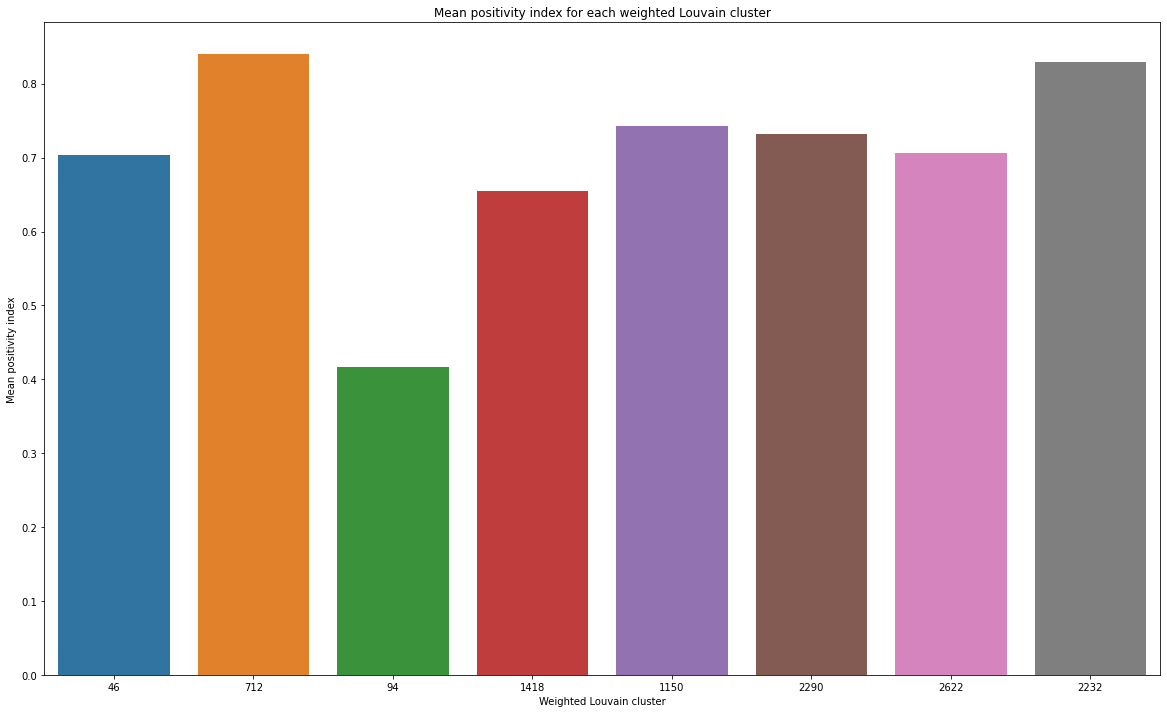

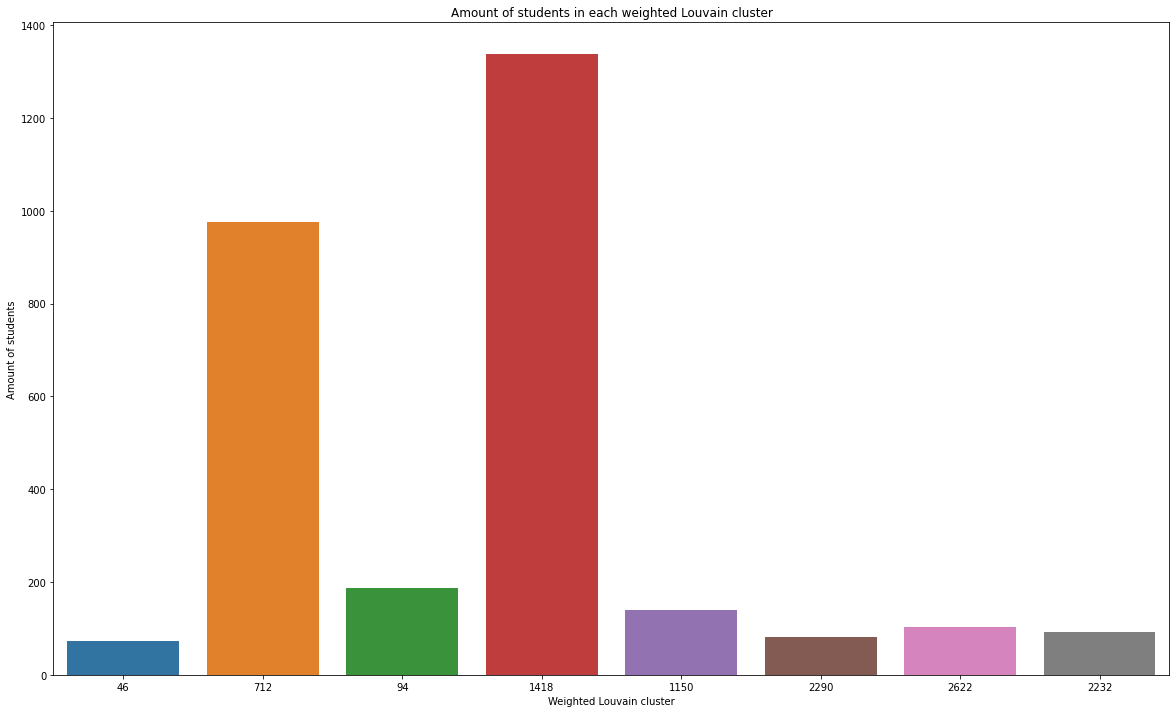

In [75]:
# Plot the results

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.barplot(louvain_similarity_clusters_positivity_index, x=louvain_similarity_clusters_positivity_index['louvain_similarity_cluster'].astype(str), y='louvain_similarity_cluster_mean_positivity_index', palette='tab10')
plt.xlabel('Weighted Louvain cluster')
plt.ylabel('Mean positivity index')
plt.title('Mean positivity index for each weighted Louvain cluster')
plt.show()

# Also plot the amount of students in each cluster

plt.figure(figsize=(20, 12))
sns.barplot(louvain_similarity_clusters_count, x=louvain_similarity_clusters_count['louvain_similarity_cluster'].astype(str), y='louvain_similarity_cluster_count', palette='tab10')
plt.xlabel('Weighted Louvain cluster')
plt.ylabel('Amount of students')
plt.title('Amount of students in each weighted Louvain cluster')
plt.show()



In [127]:
import pandas as pd

# Calulate the mean positivity index for louvain without similarity
louvain_clusters_positivity_index = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.louvainId_pos_prop as louvain_cluster
                RETURN louvain_cluster, AVG(positivity_index) AS louvain_cluster_mean_positivity_index
                """)

# Fetch the number of students in each cluster
louvain_clusters_count = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.louvainId_pos_prop as louvain_cluster
                RETURN louvain_cluster, COUNT(positivity_index) AS louvain_cluster_count
                """)

# Merge the two dataframes
louvain_clusters = louvain_clusters_positivity_index.merge(louvain_clusters_count, on='louvain_cluster')

# Add a row with the sum of all rows with 'louvain_cluster_count' == 1 called 'No community', and set the mean positivity index to the mean of all rows with 'louvain_cluster_count' == 1
louvain_clusters = pd.concat([louvain_clusters, pd.DataFrame([['No community', louvain_clusters[louvain_clusters['louvain_cluster_count'] == 1]['louvain_cluster_mean_positivity_index'].mean(), louvain_clusters[louvain_clusters['louvain_cluster_count'] == 1]['louvain_cluster_count'].sum()]], columns=['louvain_cluster', 'louvain_cluster_mean_positivity_index', 'louvain_cluster_count'])])

# Remove all rows with 'louvain_cluster_count' == 1
louvain_clusters = louvain_clusters[louvain_clusters['louvain_cluster_count'] != 1]


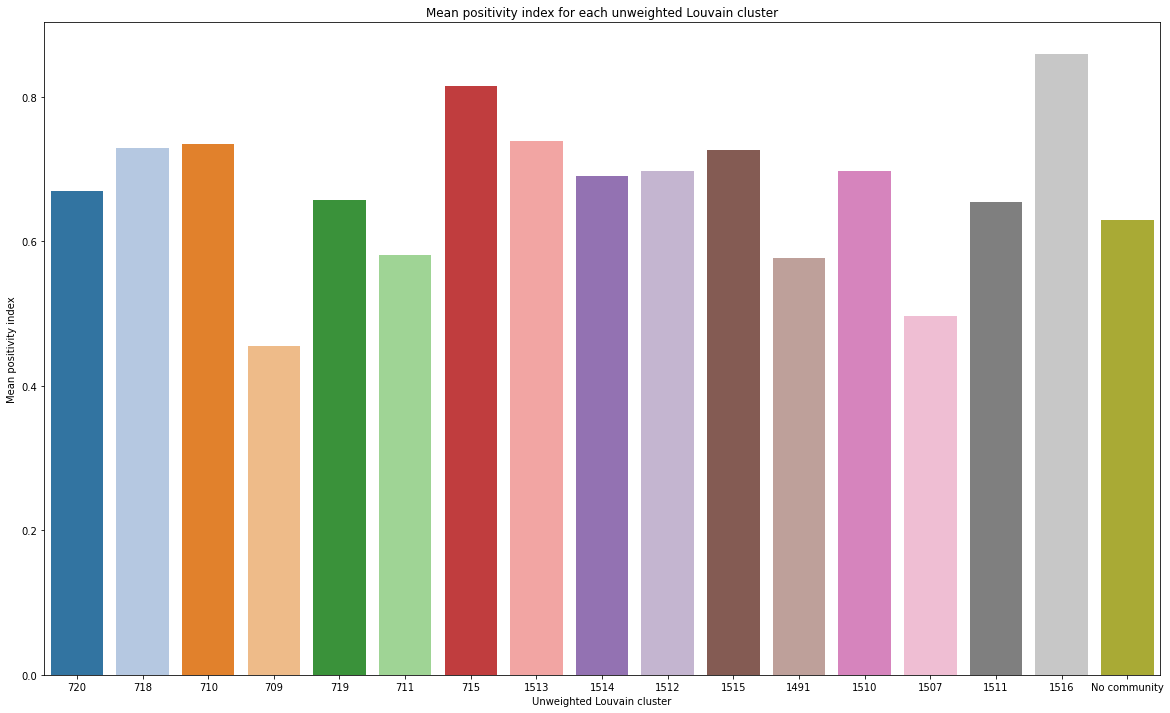

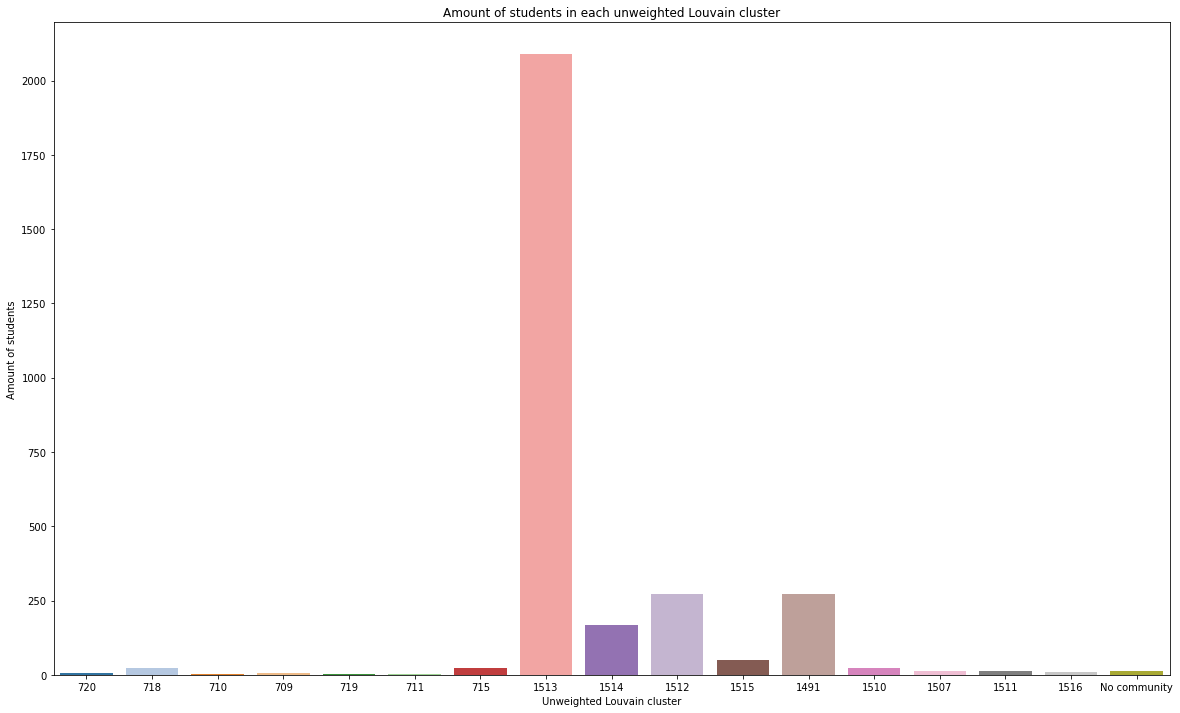

In [128]:
# Plot the results

plt.figure(figsize=(20, 12))
sns.barplot(louvain_clusters, x=louvain_clusters['louvain_cluster'].astype(str), y='louvain_cluster_mean_positivity_index', palette='tab20')
plt.xlabel('Unweighted Louvain cluster')
plt.ylabel('Mean positivity index')
plt.title('Mean positivity index for each unweighted Louvain cluster')
plt.show()

# Also plot the amount of students in each cluster

plt.figure(figsize=(20, 12))
sns.barplot(louvain_clusters, x=louvain_clusters['louvain_cluster'].astype(str), y='louvain_cluster_count', palette='tab20')
plt.xlabel('Unweighted Louvain cluster')
plt.ylabel('Amount of students')
plt.title('Amount of students in each unweighted Louvain cluster')
plt.show()


In [78]:
# Calculate the mean positivity index for lpa with similarity
lpa_similarity_clusters_positivity_index = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.lpaId_similarity_pos_prop as lpa_similarity_cluster
                RETURN lpa_similarity_cluster, AVG(positivity_index) AS lpa_similarity_cluster_mean_positivity_index
                """)

# Fetch the number of students in each cluster
lpa_similarity_clusters_count = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.lpaId_similarity_pos_prop as lpa_similarity_cluster
                RETURN lpa_similarity_cluster, COUNT(positivity_index) AS lpa_similarity_cluster_count
                """)



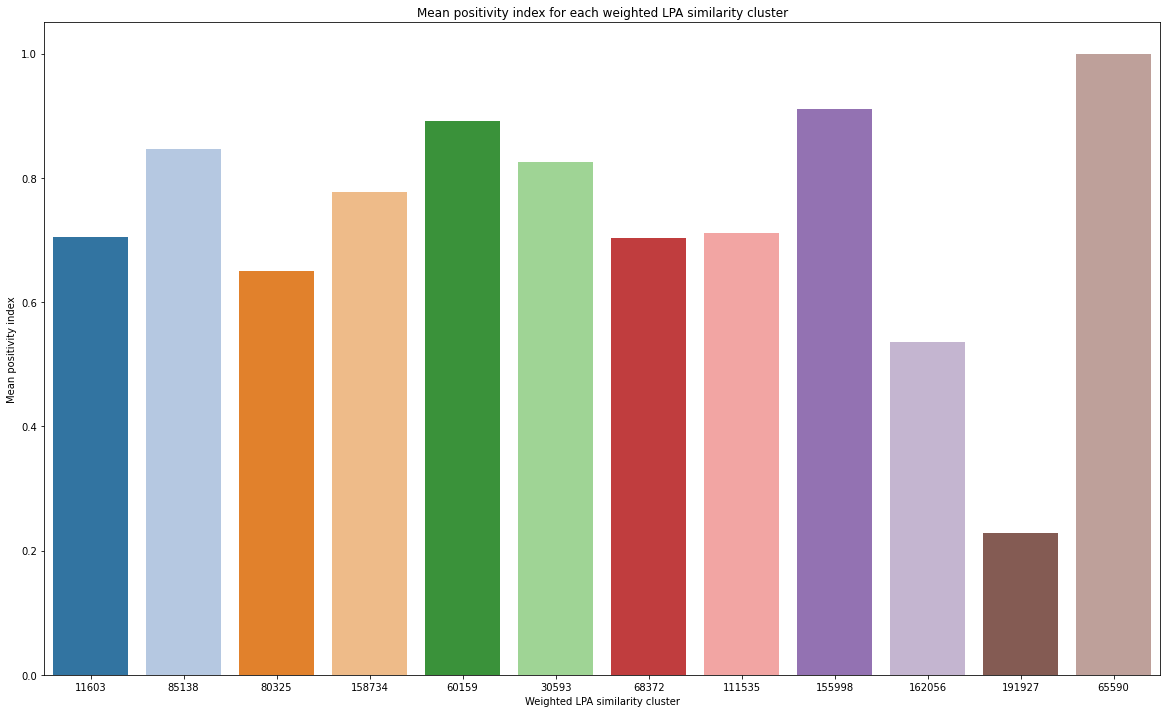

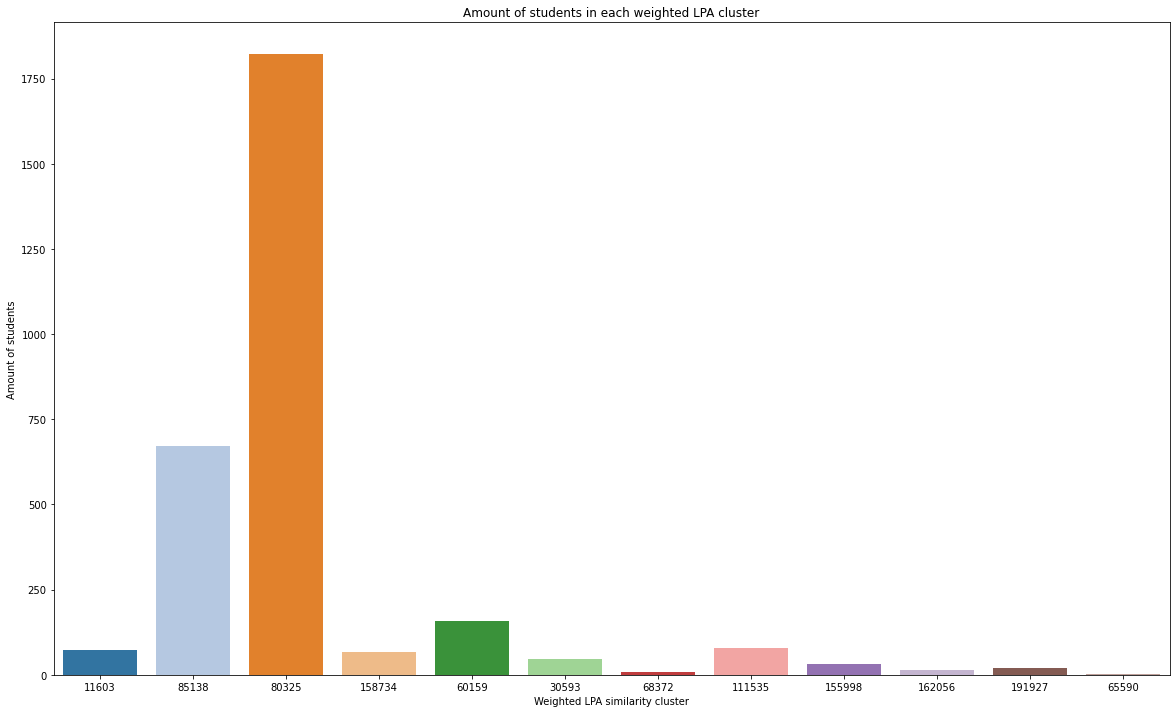

In [79]:
# Plot the results

plt.figure(figsize=(20, 12))
sns.barplot(lpa_similarity_clusters_positivity_index, x=lpa_similarity_clusters_positivity_index['lpa_similarity_cluster'].astype(str), y='lpa_similarity_cluster_mean_positivity_index', palette='tab20')
plt.xlabel('Weighted LPA similarity cluster')
plt.ylabel('Mean positivity index')
plt.title('Mean positivity index for each weighted LPA similarity cluster')
plt.show()

# Also plot the amount of students in each cluster

plt.figure(figsize=(20, 12))
sns.barplot(lpa_similarity_clusters_count, x=lpa_similarity_clusters_count['lpa_similarity_cluster'].astype(str), y='lpa_similarity_cluster_count', palette='tab20')
plt.xlabel('Weighted LPA similarity cluster')
plt.ylabel('Amount of students')
plt.title('Amount of students in each weighted LPA cluster')
plt.show()



In [126]:
import pandas as pd

# Calculate the mean positivity index for lpa without similarity
lpa_clusters_positivity_index = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.lpaId_pos_prop as lpa_cluster
                RETURN lpa_cluster, AVG(positivity_index) AS lpa_cluster_mean_positivity_index
                """)
# Fetch the number of students in each cluster
lpa_clusters_count = gds.run_cypher("""
                MATCH (s:Student)
                WHERE s.positivityIndex IS NOT NULL
                WITH s, s.positivityIndex AS positivity_index, s.lpaId_pos_prop as lpa_cluster
                RETURN lpa_cluster, COUNT(positivity_index) AS lpa_cluster_count
                """)

# Merge the two dataframes
lpa_clusters = lpa_clusters_positivity_index.merge(lpa_clusters_count, on='lpa_cluster')

# Add a row with the sum of all rows with 'lpa_cluster_count' == 1 called 'No community', and set the mean positivity index to the mean of all rows with 'lpa_cluster_count' == 1
lpa_clusters = pd.concat([lpa_clusters, pd.DataFrame([['No community', lpa_clusters[lpa_clusters['lpa_cluster_count'] == 1]['lpa_cluster_mean_positivity_index'].mean(), lpa_clusters[lpa_clusters['lpa_cluster_count'] == 1]['lpa_cluster_count'].sum()]], columns=lpa_clusters.columns)], ignore_index=True)

# Remove all rows with 'lpa_cluster_count' == 1
lpa_clusters = lpa_clusters[lpa_clusters['lpa_cluster_count'] != 1]

     lpa_cluster  lpa_cluster_mean_positivity_index  lpa_cluster_count
0           6973                           0.592280                 12
1           6966                           0.727078                 18
4           6965                           0.723077                 24
5           6978                           0.866355                  9
6           6985                           0.730598                  4
7           6977                           0.725743                  2
9          13086                           0.739682               2094
10         13081                           0.575749                 96
11         13085                           0.660212                308
12         13080                           0.501227                106
13         13083                           0.708540                139
14         13104                           0.791889                 20
15         13103                           0.783994                 22
16    

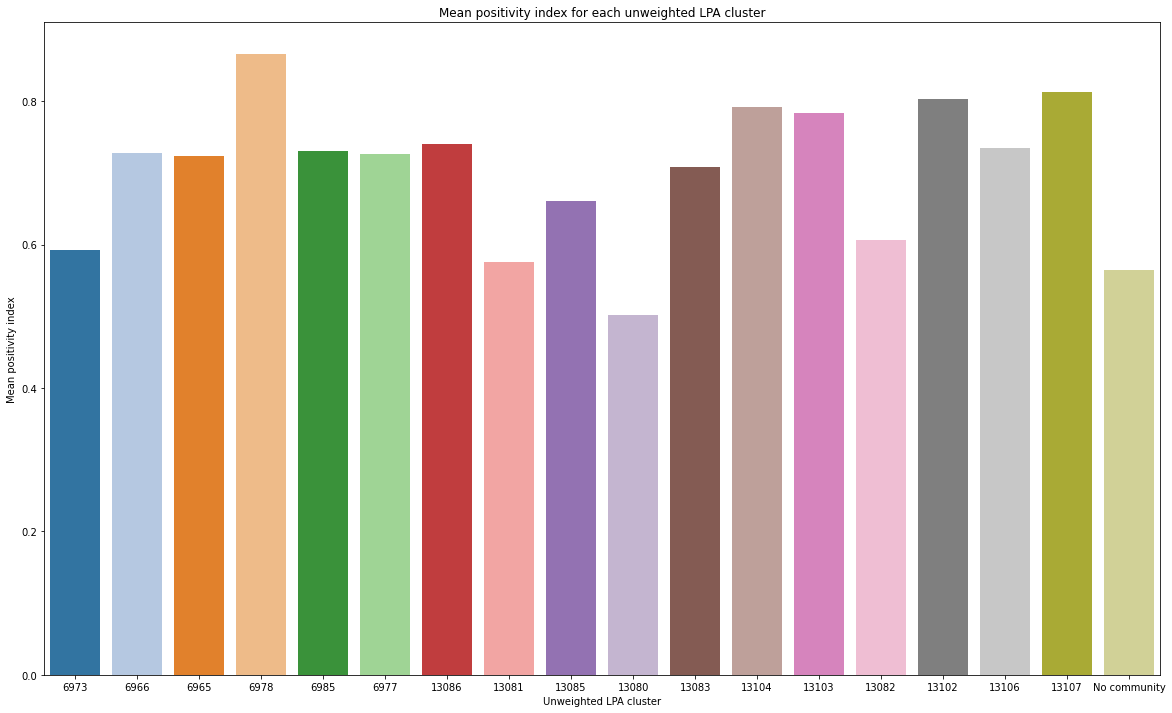

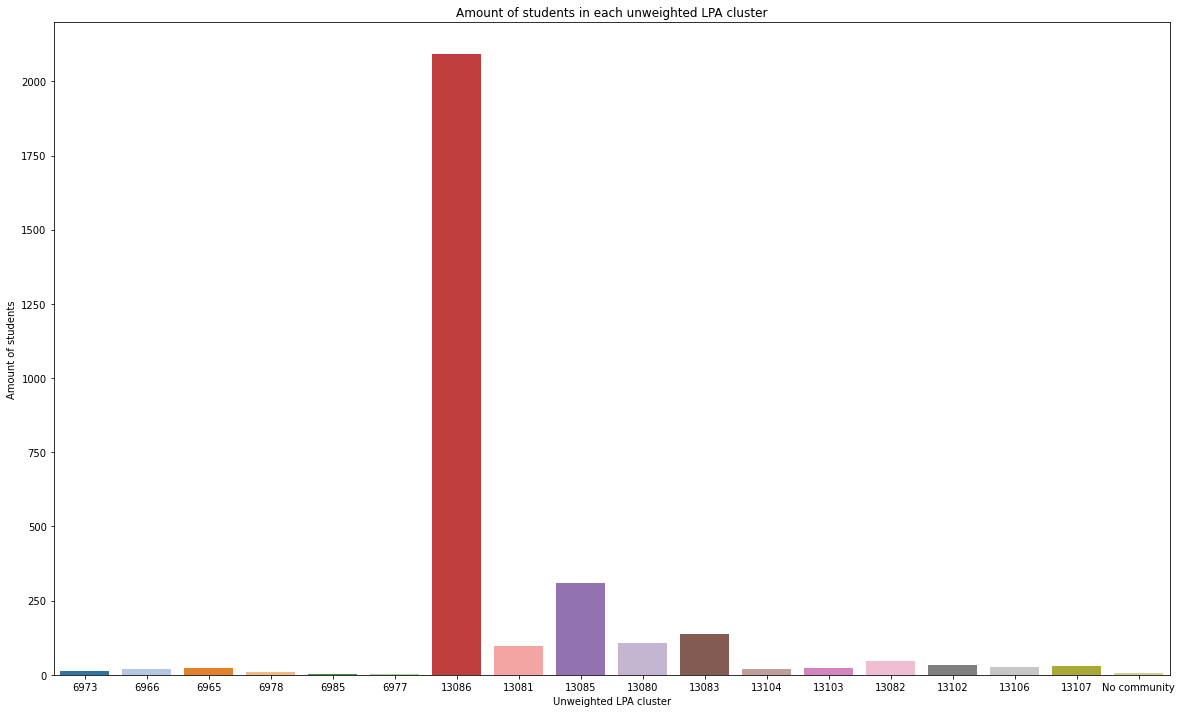

In [125]:
# Plot the results

plt.figure(figsize=(20, 12))
sns.barplot(lpa_clusters, x=lpa_clusters['lpa_cluster'].astype(str), y='lpa_cluster_mean_positivity_index', palette='tab20')
plt.xlabel('Unweighted LPA cluster')
plt.ylabel('Mean positivity index')
plt.title('Mean positivity index for each unweighted LPA cluster')
plt.show()

# Also plot the amount of students in each cluster

plt.figure(figsize=(20, 12))
sns.barplot(lpa_clusters, x=lpa_clusters['lpa_cluster'].astype(str), y='lpa_cluster_count', palette='tab20')
plt.xlabel('Unweighted LPA cluster')
plt.ylabel('Amount of students')
plt.title('Amount of students in each unweighted LPA cluster')
plt.show()
